In [25]:
import sys
import numpy
import pandas as pd
import struct
import os
import path
import matplotlib.pyplot as plt

In [2]:
#Code for reading MNIST DataSet:
def read_idxfile(idxfilename):
    with open(idxfilename, 'rb') as open_file:
        zero, data_type, dims = struct.unpack('>HBB', open_file.read(4))
        shape = tuple(struct.unpack('>I', open_file.read(4))[0] for d in range(dims))
        return numpy.fromstring(open_file.read(), dtype=numpy.uint8).reshape(shape)

In [3]:
#Extracting Train and Test data along with labels:
train_data = read_idx('train-images.idx3-ubyte')
train_labels = read_idx('train-labels.idx1-ubyte')

test_data = read_idx('t10k-images.idx3-ubyte')
test_labels = read_idx('t10k-labels.idx1-ubyte')

In [4]:
W = numpy.random.uniform(-1,1,size=(10,784));
n = 60000;
eta = 1;
epoch = 0;
errors = {};
threshold_e = 0.15;

In [5]:
digits_labels = {};
for i in range(10):
    temp = numpy.zeros(10);
    temp[i] = 1;
    digits_labels[i] = temp;

In [6]:
def compareOutput(output,actual_label):
    image_vector = digits_labels.get(actual_label);
    if (numpy.array_equal(output,image_vector)):
        return True;
    else:
        return False;

In [7]:
def getLargestComponentIndex(v):
    return v.argmax(axis=0);

In [8]:
def activation_function(x):
    v = numpy.squeeze(numpy.asarray(x));
    for i in range(len(x)):
        if (x[i] >= 0) == True:
            x[i] = 1;
        else:
            x[i] = 0;
    return x;

In [9]:
def countMissClassificationErrors(W,input_matrix,input_labels,errors,epoch):
    for i in range(n):
        image_vector = input_matrix[i];
        image_vector.resize(784,1);
        #temp = df[i:(i+1)];
        #rowList = temp.values.tolist()[0];
        actual_label = input_labels[i];
        v = numpy.matmul(W,image_vector);
        isDesiredOutput = compareOutput(v,actual_label);
        #The case of having more than one output in neuron, full zeroes or incorrect predicted label is automatically 
        #handled in this false condition.
        if(isDesiredOutput == False):
            largestComponentIndex = getLargestComponentIndex(v);
            if(largestComponentIndex != actual_label):
                errors[epoch] = errors.get(epoch) + 1;
                #if(errors.get(epoch) == None):
                    #errors[epoch] = 1;
                #else:     

In [10]:
def updateWeights(W,errors):
    for i in range(n):
        image_vector = train_data[i];
        image_vector.resize(784,1);
        actual_label = train_labels[i];
        #temp = df[i:(i+1)];
        #rowList = temp.values.tolist()[0];
        #actual_label = rowList[0];
        #image_vector = numpy.array(rowList[1:]);
        x_transpose = numpy.transpose(image_vector);
        x_transpose_matrix = numpy.asmatrix(x_transpose);
        desired_output = digits_labels.get(actual_label);
        desired_output.resize(10,1);
        v = numpy.matmul(W,image_vector);
        u_v = numpy.array(activation_function(v));
        difference_matrix = (desired_output - u_v);
        difference_product = numpy.matmul(difference_matrix,x_transpose_matrix);
        product = eta*difference_product;
        product = numpy.squeeze(numpy.asarray(product));
        temp = W;
        W = W + product;
    return W;

In [11]:
def train_perceptron():
    tempW = W;
    epoch = 0;
    while True:
        errors[epoch] = 0;
        countMissClassificationErrors(tempW,train_data,train_labels,errors,epoch);
        epoch = epoch + 1;
        tempW = updateWeights(tempW,errors);
        index = epoch - 1;
        if(errors[epoch - 1]/float(n) <= threshold_e):
            break;
        if(epoch == 100):
            break
    return tempW;

In [12]:
updated_weights = train_perceptron();

In [13]:
test_errors = {};
test_errors[0] = 0;
n = 10000;
countMissClassificationErrors(updated_weights,test_data,test_labels,test_errors,0);
print "Number of Testing Errors: ",test_errors.get(0);
print "Percentage of Testing Errors: ",(test_errors.get(0)/float(n))*100,"%";

Number of Testing Errors:  1580
Percentage of Testing Errors:  15.8 %


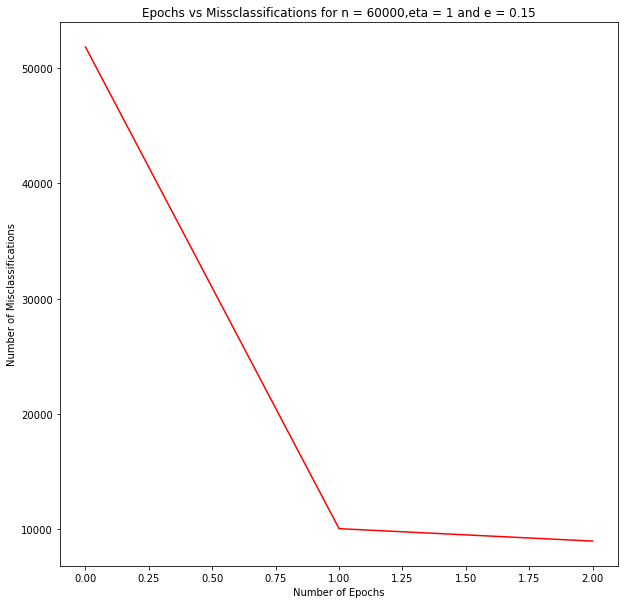

In [14]:
n_epochs = range(len(errors));
fig, ax = plt.subplots(figsize=(10,10));
ax.plot(n_epochs,errors.values(), c = 'red');
plt.title('Epochs vs Missclassifications for n = 60000,eta = 1 and e = 0.15');
plt.ylabel('Number of Misclassifications');
plt.xlabel('Number of Epochs');
plt.show();

In [15]:
W = numpy.random.uniform(-1,1,size=(10,784));
n = 50;
eta = 1;
epoch = 0;
errors = {};
threshold_e = 0.0;
updated_weights = train_perceptron();

In [16]:
#"Testing on samples for updated weights!!!!!"
test_errors = {};
test_errors[0] = 0;
n = 10000;
countMissClassificationErrors(updated_weights,test_data,test_labels,test_errors,0);
print "Number of Testing Errors: ",test_errors.get(0);
print "Percentage of Testing Errors: ",(test_errors.get(0)/float(n))*100,"%";

Number of Testing Errors:  4745
Percentage of Testing Errors:  47.45 %


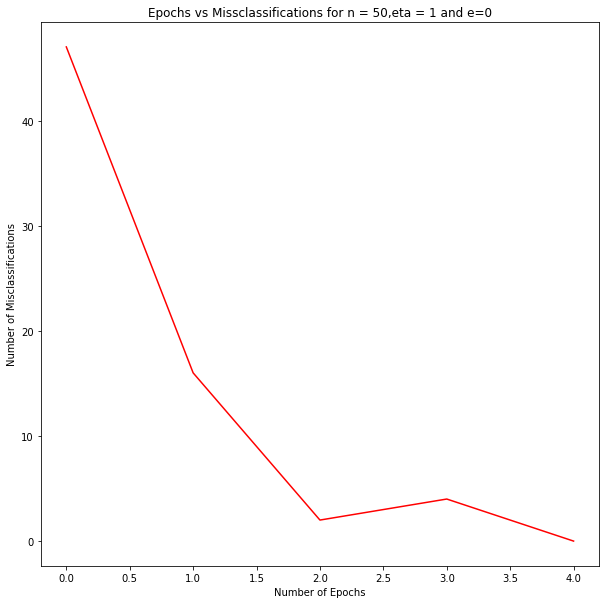

In [17]:
n_epochs = range(len(errors));
fig, ax = plt.subplots(figsize=(10,10));
ax.plot(n_epochs,errors.values(), c = 'red');
plt.title('Epochs vs Missclassifications for n = 50,eta = 1 and e=0');
plt.ylabel('Number of Misclassifications');
plt.xlabel('Number of Epochs');
plt.show();

In [18]:
W = numpy.random.uniform(-1,1,size=(10,784));
n = 1000;
eta = 1;
epoch = 0;
errors = {};
threshold_e = 0.0;
updated_weights = train_perceptron();

In [19]:
#"Testing on samples for updated weights!!!!!"
test_errors = {};
test_errors[0] = 0;
n = 10000;
countMissClassificationErrors(updated_weights,test_data,test_labels,test_errors,0);
print "Number of Testing Errors: ",test_errors.get(0);
print "Percentage of Testing Errors: ",(test_errors.get(0)/float(n))*100,"%";

Number of Testing Errors:  1905
Percentage of Testing Errors:  19.05 %


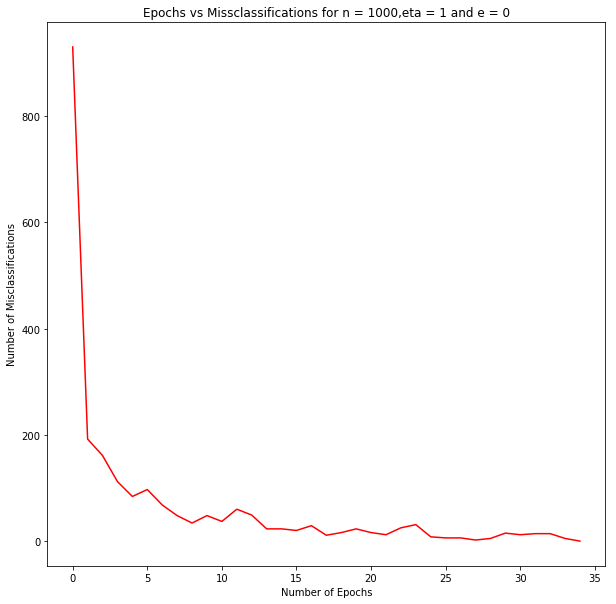

In [20]:
n_epochs = range(len(errors));
fig, ax = plt.subplots(figsize=(10,10));
ax.plot(n_epochs,errors.values(), c = 'red');
plt.title('Epochs vs Missclassifications for n = 1000,eta = 1 and e = 0');
plt.ylabel('Number of Misclassifications');
plt.xlabel('Number of Epochs');
plt.show();

In [22]:
W = numpy.random.uniform(-1,1,size=(10,784));
n = 60000;
eta = 1;
epoch = 0;
errors = {};
threshold_e = 0.0;
updated_weights = train_perceptron();

In [23]:
#"Testing on samples for updated weights!!!!!"
test_errors = {};
test_errors[0] = 0;
n = 10000;
countMissClassificationErrors(updated_weights,test_data,test_labels,test_errors,0);
print "Number of Testing Errors: ",test_errors.get(0);
print "Percentage of Testing Errors: ",(test_errors.get(0)/float(n))*100,"%";

Number of Testing Errors:  1579
Percentage of Testing Errors:  15.79 %


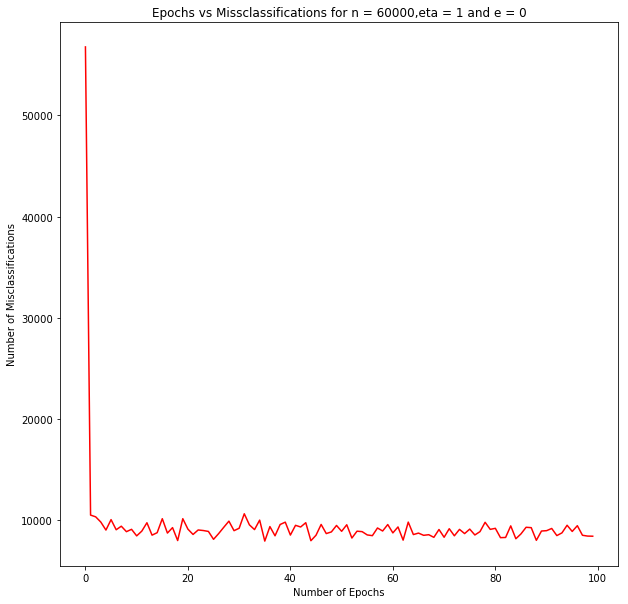

In [24]:
n_epochs = range(len(errors));
fig, ax = plt.subplots(figsize=(10,10));
ax.plot(n_epochs,errors.values(), c = 'red');
plt.title('Epochs vs Missclassifications for n = 60000,eta = 1 and e = 0');
plt.ylabel('Number of Misclassifications');
plt.xlabel('Number of Epochs');
plt.show();

In [38]:
W = numpy.random.uniform(-1,1,size=(10,784));
n = 60000;
eta = 0.5;
epoch = 0;
errors = {};
threshold_e = 0.15;
updated_weights = train_perceptron();

In [39]:
#"Testing on samples for updated weights!!!!!"
test_errors = {};
test_errors[0] = 0;
n = 10000;
countMissClassificationErrors(updated_weights,test_data,test_labels,test_errors,0);
print "Number of Testing Errors: ",test_errors.get(0);
print "Percentage of Testing Errors: ",(test_errors.get(0)/float(n))*100,"%";

Number of Testing Errors:  1609
Percentage of Testing Errors:  16.09 %


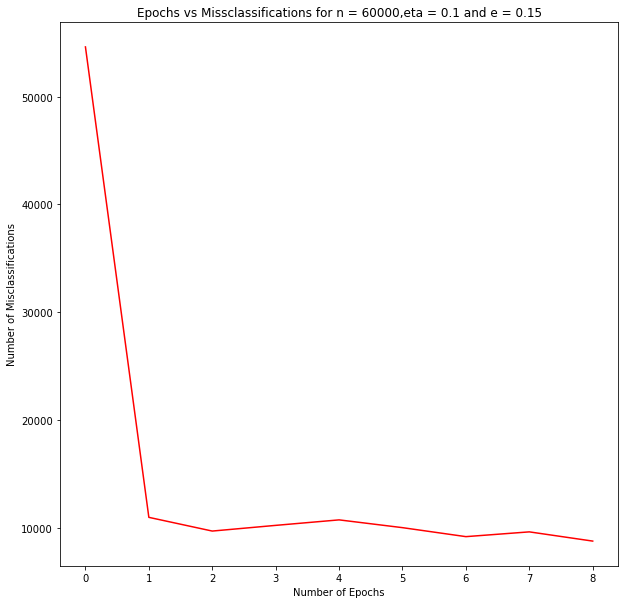

In [40]:
n_epochs = range(len(errors));
fig, ax = plt.subplots(figsize=(10,10));
ax.plot(n_epochs,errors.values(), c = 'red');
plt.title('Epochs vs Missclassifications for n = 60000,eta = 0.1 and e = 0.15');
plt.ylabel('Number of Misclassifications');
plt.xlabel('Number of Epochs');
plt.show();

In [41]:
W = numpy.random.uniform(-1,1,size=(10,784));
n = 60000;
eta = 0.1;
epoch = 0;
errors = {};
threshold_e = 0.15;
updated_weights = train_perceptron();

In [42]:
#"Testing on samples for updated weights!!!!!"
test_errors = {};
test_errors[0] = 0;
n = 10000;
countMissClassificationErrors(updated_weights,test_data,test_labels,test_errors,0);
print "Number of Testing Errors: ",test_errors.get(0);
print "Percentage of Testing Errors: ",(test_errors.get(0)/float(n))*100,"%";

Number of Testing Errors:  1655
Percentage of Testing Errors:  16.55 %


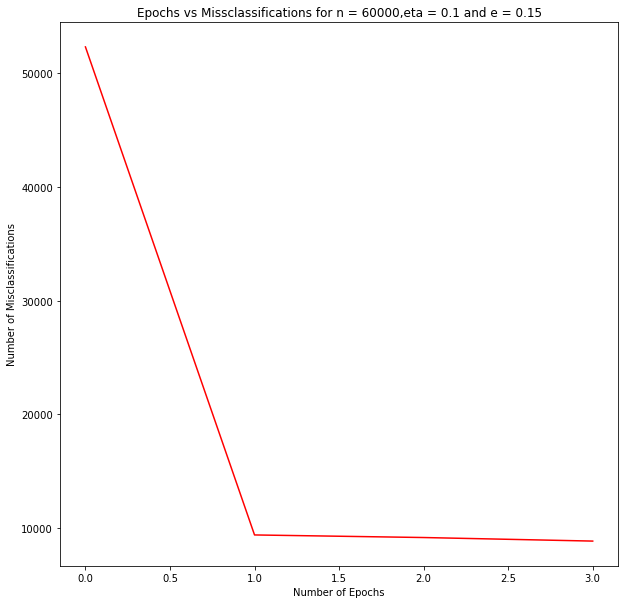

In [43]:
n_epochs = range(len(errors));
fig, ax = plt.subplots(figsize=(10,10));
ax.plot(n_epochs,errors.values(), c = 'red');
plt.title('Epochs vs Missclassifications for n = 60000,eta = 0.1 and e = 0.15');
plt.ylabel('Number of Misclassifications');
plt.xlabel('Number of Epochs');
plt.show();